In [78]:
import subprocess
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
import matplotlib
import matplotlib.font_manager as fm
matplotlib.rc('font', size=18)

In [51]:
N = str(256)
n_trials = str(100)
T = [str(n) for n in [4, 8, 16, 32, 64, 128]]
U = [str(n) for n in [4, 8, 16, 32, 64, 128]]

In [52]:
prog = '/home/craffel/projects/mad_benchmark/monotonicspeed'
mono_times = np.zeros((len(T), len(U)))
for n, m in itertools.product(range(len(T)), range(len(U))):
    mono_times[n, m] = float(subprocess.check_output([prog, T[n], U[m], N, n_trials]).strip())

([<matplotlib.axis.YTick at 0x7f7afca00fd0>,
 <a list of 6 Text yticklabel objects>)

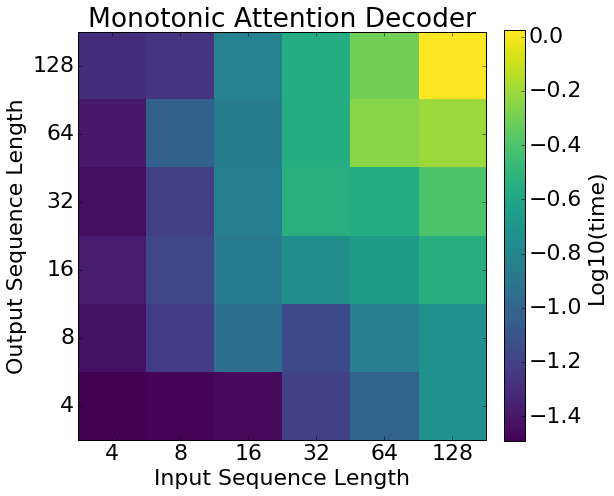

In [75]:
plt.figure(figsize=(8, 8))
im = plt.imshow(np.log10(mono_times), cmap=plt.cm.viridis, origin='lower', interpolation='nearest')
plt.colorbar(im, label='Log10(time)', fraction=0.046, pad=0.04)
plt.xticks(range(len(T)), T)
plt.ylabel('Output Sequence Length')
plt.xlabel('Input Sequence Length')
plt.title('Monotonic Attention Decoder')
plt.yticks(range(len(U)), U)

In [29]:
prog = '/home/craffel/projects/mad_benchmark/softmaxspeed'
soft_times = np.zeros((len(T), len(U)))
for n, m in itertools.product(range(len(T)), range(len(U))):
    soft_times[n, m] = float(subprocess.check_output([prog, T[n], U[m], N, n_trials]).strip())

([<matplotlib.axis.YTick at 0x7f7afc936bd0>,
 <a list of 6 Text yticklabel objects>)

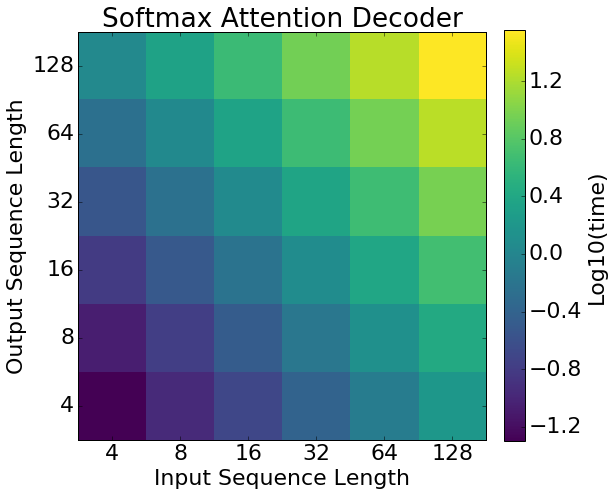

In [76]:
plt.figure(figsize=(8, 8))
im = plt.imshow(np.log10(soft_times), cmap=plt.cm.viridis, origin='lower', interpolation='nearest')
plt.colorbar(im, label='Log10(time)', fraction=0.046, pad=0.04)
plt.xticks(range(len(T)), T)
plt.ylabel('Output Sequence Length')
plt.xlabel('Input Sequence Length')
plt.title('Softmax Attention Decoder')
plt.yticks(range(len(U)), U)

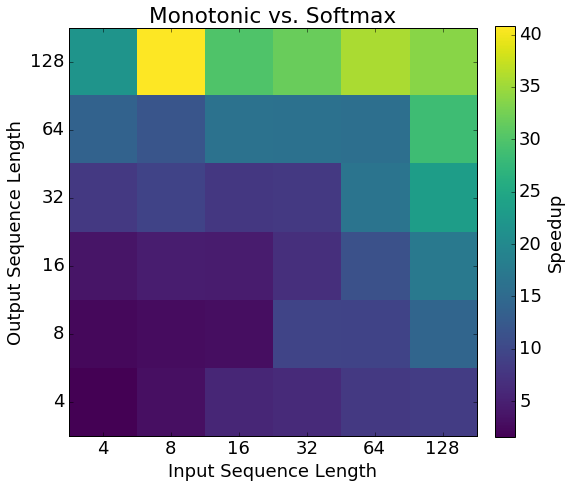

In [90]:
plt.figure(figsize=(8, 8))
im = plt.imshow(soft_times/mono_times, cmap=plt.cm.viridis, origin='lower', interpolation='nearest')
plt.colorbar(im, label='Speedup', fraction=0.046, pad=0.04)
plt.xticks(range(len(T)), T)
plt.ylabel('Output Sequence Length')
plt.xlabel('Input Sequence Length')
plt.title('Monotonic vs. Softmax')
plt.yticks(range(len(U)), U)
plt.savefig('speed.pdf')